## General set-up

In [1]:
import random
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [2]:
pd.set_option('mode.chained_assignment', None)

In [3]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep=';'
)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004725,2019,1505536,Parauapebas,15,PA,20,F,1,3,1,1505536.0,Parauapebas,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505536,Parauapebas,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,A,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
1,190001004774,2019,1502905,Curuçá,15,PA,19,F,1,3,1,1501402.0,Belém,15.0,PA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1502905,Curuçá,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,B,B,5,B,A,C,C,A,A,B,A,A,A,B,A,A,B,B,B,C,A,A,A
2,190001004886,2019,1504208,Marabá,15,PA,18,M,1,3,1,1504208.0,Marabá,15.0,PA,2,0,2,1.0,0,15127281.0,1504208.0,Marabá,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,1,1,1,1,505.0,508.0,512.0,518.0,379.3,433.8,408.2,360.5,EDACBEBEBDCAEBCDABCDABEDCDBAAEACEDCADEAABABDC,CBCEBECECECEBEDBDDECADABCCEBADCBECBAEBBDBECDB,99999ECCBBAEDBAABBEABADDCAAABCABDBBCDEBDAEDBCA...,CEBCBECDBCEEECABABCACBCCDBCEECBBCBCDBDEBCCAAD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,3.0,0.0,0.0,0.0,0.0,0.0,0.0,D,E,A,A,4,B,A,A,D,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A
3,190001004970,2019,1502905,Curuçá,15,PA,24,F,1,3,1,1501402.0,Belém,15.0,PA,1,7,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1502905,Curuçá,15,PA,1,1,1,1,504.0,510.0,513.0,516.0,367.9,511.0,521.2,465.5,BACEEDDEECBBDECEBADBBDCEAE*EDBBCCDBEEECDBBEEB,AEECAEBBBDBAACCBCDDACCBBBEDDBBBDBCCBCCDBDACAC,99999DAAECBABBEBDACEEADDEBAEDCBADEBAABEEECCCDD...,DACACBDABDAEAAECCDEECDBDBCBEBBCBDBAACEBCDDACC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBAC

## Data Wrangling

In [4]:
answers = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']
correct_answers = ['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']
scores = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
foreign_language = ['TP_LINGUA']
subset = df[foreign_language+answers+correct_answers+scores+['NU_NOTA_REDACAO']]

In [5]:
subset.head()

,TP_LINGUA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,EDACBEBEBDCAEBCDABCDABEDCDBAAEACEDCADEAABABDC,CBCEBECECECEBEDBDDECADABCCEBADCBECBAEBBDBECDB,99999ECCBBAEDBAABBEABADDCAAABCABDBBCDEBDAEDBCA...,CEBCBECDBCEEECABABCACBCCDBCEECBBCBCDBDEBCCAAD,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,379.3,433.8,408.2,360.5,0.0
3,1,BACEEDDEECBBDECEBADBBDCEAE*EDBBCCDBEEECDBBEEB,AEECAEBBBDBAACCBCDDACCBBBEDDBBBDBCCBCCDBDACAC,99999DAAECBABBEBDACEEADDEBAEDCBADEBAABEEECCCDD...,DACACBDABDAEAAECCDEECDBDBCBEBBCBDBAACEBCDDACC,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,367.9,511.0,521.2,465.5,480.0
4,1,DADCEACCECDADDCADADCDEDEAECBCECAABEAAABEABEBB,CDABCBACAADBBCDAEDEEBCBBDDCDBDACBEDECBDECACEB,99999ECEDBECDDBAADCBDCBDABAEAEBAEDEDBDEADBEADC...,AACCABEACCAAADCCECECCCEDCDEBCEDACDCCCDEDCEEAA,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,408.8,383.7,419.6,531.1,420.0


In [6]:
subset = subset.dropna()

In [7]:
subset['TX_RESPOSTAS_LC'] = subset['TX_RESPOSTAS_LC'].str.replace('9', '')

In [8]:
subset.loc[subset.TP_LINGUA == 0, 'TX_GABARITO_LC'] = subset.query('TP_LINGUA ==0')['TX_GABARITO_LC'].str.slice(stop=5)+subset['TX_GABARITO_LC'].str.slice(start=10)

In [9]:
subset.loc[subset.TP_LINGUA == 1, 'TX_GABARITO_LC'] = subset['TX_GABARITO_LC'].str.slice(start=5)

In [10]:
subset['ACERTOS_CN'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_CN'])) == np.array(list(x['TX_GABARITO_CN']))), axis=1)
subset['ACERTOS_CH'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_CH'])) == np.array(list(x['TX_GABARITO_CH']))), axis=1)
subset['ACERTOS_LC'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_LC'])) == np.array(list(x['TX_GABARITO_LC']))), axis=1)
subset['ACERTOS_MT'] = subset.apply(lambda x: np.sum(np.array(list(x['TX_RESPOSTAS_MT'])) == np.array(list(x['TX_GABARITO_MT']))), axis=1)

In [11]:
subset['SOMA_NOTAS_OBJ'] = subset[scores].sum(axis=1)

In [12]:
subset = subset.drop(columns=foreign_language+answers+correct_answers)

In [13]:
subset.shape

(36879, 10)

In [14]:
hits = ['ACERTOS_CN', 'ACERTOS_CH', 'ACERTOS_LC', 'ACERTOS_MT']
subset = subset[scores + hits + ['SOMA_NOTAS_OBJ', 'NU_NOTA_REDACAO']]
subset.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,ACERTOS_CN,ACERTOS_CH,ACERTOS_LC,ACERTOS_MT,SOMA_NOTAS_OBJ,NU_NOTA_REDACAO
2,379.3,433.8,408.2,360.5,8,12,10,5,1581.8,0.0
3,367.9,511.0,521.2,465.5,9,15,17,5,1865.6,480.0
4,408.8,383.7,419.6,531.1,11,7,9,11,1743.2,420.0
6,393.9,396.9,350.7,361.8,8,8,8,6,1503.3,620.0
8,398.2,327.1,440.4,364.8,10,5,11,7,1530.5,460.0


## Machine Learning

In [15]:
caret_df = setup(data = subset, target = 'SOMA_NOTAS_OBJ', session_id=55, ignore_features=scores+['NU_NOTA_REDACAO'])

,Description,Value
0,session_id,55
1,Target,SOMA_NOTAS_OBJ
2,Original Data,"(36879, 10)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(25815, 4)"


In [16]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,48.3822,3935.8891,62.7280,0.9503,0.0438,0.0249,4.6340
lightgbm,Light Gradient Boosting Machine,49.1910,4079.3153,63.8616,0.9484,0.0443,0.0253,0.4160
gbr,Gradient Boosting Regressor,50.1026,4133.3317,64.2806,0.9477,0.0429,0.0257,0.1380
xgboost,Extreme Gradient Boosting,49.9860,4168.7311,64.5594,0.9473,0.0440,0.0257,1.8850
knn,K Neighbors Regressor,52.8925,4749.2783,68.9060,0.9400,0.0471,0.0271,0.0330
rf,Random Forest Regressor,53.8033,4892.0853,69.9315,0.9381,0.0469,0.0276,0.3890
en,Elastic Net,57.1332,5250.2872,72.4318,0.9337,0.0485,0.0289,0.0070
br,Bayesian Ridge,57.0987,5248.0730,72.4165,0.9337,0.0484,0.0289,0.0270
ridge,Ridge Regression,57.0987,5248.0734,72.4165,0.9337,0.0484,0.0289,0.0370
lasso,Lasso Regression,57.1022,5248.1060,72.4168,0.9337,0.0484,0.0289,0.3720


In [17]:
cat_reg = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.2636,3839.3474,61.9625,0.9523,0.0326,0.0249
1,47.5348,4180.0846,64.6536,0.9488,0.1417,0.0241
2,47.6049,3775.8875,61.4483,0.9507,0.0331,0.0247
3,49.5686,4052.7406,63.6611,0.9490,0.0335,0.0255
4,48.0852,3833.3956,61.9144,0.9524,0.0324,0.0248
5,50.0535,4125.2238,64.2279,0.9447,0.0337,0.0257
6,48.0712,3887.8888,62.3529,0.9512,0.0327,0.0247
7,48.5781,3921.3332,62.6205,0.9505,0.0327,0.0249
8,47.4773,3808.9893,61.7170,0.9513,0.0325,0.0245
9,48.5851,3934.0001,62.7216,0.9517,0.0329,0.0249


In [18]:
tuned_cat = tune_model(cat_reg)
print(tuned_cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.9440,3925.7862,62.6561,0.9513,0.0334,0.0253
1,47.6759,4486.3571,66.9803,0.9451,0.1467,0.0241
2,48.2574,4023.0015,63.4271,0.9474,0.0348,0.0251
3,50.4403,4214.5012,64.9192,0.9470,0.0345,0.0260
4,48.6397,3866.7913,62.1835,0.9520,0.0324,0.0250
5,50.6926,4198.1278,64.7930,0.9437,0.0340,0.0261
6,48.5826,3910.0361,62.5303,0.9509,0.0327,0.0249
7,49.1151,3944.8867,62.8083,0.9502,0.0329,0.0252
8,48.1518,3852.6702,62.0699,0.9507,0.0326,0.0248
9,49.1334,4095.1843,63.9936,0.9497,0.0338,0.0252


In [24]:
plot_model(tuned_cat, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,210
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


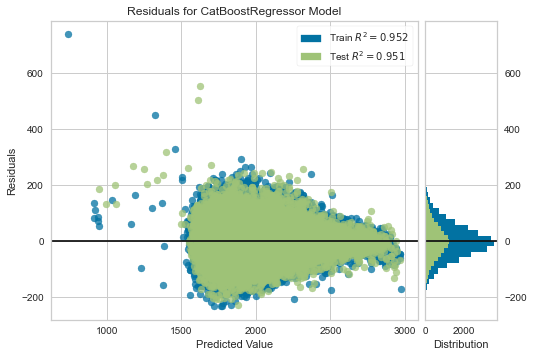

In [22]:
plot_model(tuned_cat, plot = 'residuals')

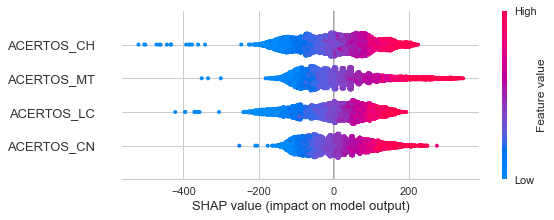

In [20]:
interpret_model(tuned_cat)

In [21]:
save_model(tuned_cat, 'model/enem_predictor')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['NU_NOTA_CN',
                                                        'NU_NOTA_CH',
                                                        'NU_NOTA_LC',
                                                        'NU_NOTA_MT',
                                                        'NU_NOTA_REDACAO'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='SOMA_NOTAS_OBJ',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_avail...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='SOMA_NOTAS_OBJ'))